# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress
from scipy import stats
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

638

In [6]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : albany
City not found. Skipping...
Processing Record 2 of Set 1 : korem
Processing Record 3 of Set 1 : bluff
Processing Record 4 of Set 1 : ivankiv
Processing Record 5 of Set 1 : rikitea
Processing Record 6 of Set 1 : shimoda
Processing Record 7 of Set 1 : hobart
Processing Record 8 of Set 1 : taguatinga
Processing Record 9 of Set 1 : igrim
Processing Record 10 of Set 1 : bac lieu
Processing Record 11 of Set 1 : port alfred
Processing Record 12 of Set 1 : hermanus
City not found. Skipping...
Processing Record 13 of Set 1 : ulverstone
Processing Record 14 of Set 1 : pisco
Processing Record 15 of Set 1 : vaini
Processing Record 16 of Set 1 : mataura
City not found. Skipping...
Processing Record 17 of Set 1 : kaitangata
Processing Record 18 of Set 1 : saint-philippe
Processing Record 19 of Set 1 : henties bay
Processing Record 20 of Set 1 : ajjampur
Processing Record 21 of Set 1 : aklavik
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
# Create a panda data frame using data retrieved
weather_dict = { "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                 "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list,
                "Country" : country_list,
                "Date" : date_list,
                
                
                
               
                
}
weather_df = pd.DataFrame(weather_dict)

In [12]:
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,77.76,61,55,6.82,US,1627075959
1,Korem,12.5058,39.5228,57.13,79,100,8.81,ET,1627075959
2,Bluff,-46.6000,168.3333,43.81,79,75,11.01,NZ,1627075960
3,Ivankiv,50.9386,29.8943,71.60,68,96,5.32,UA,1627075960
4,Rikitea,-23.1203,-134.9692,71.35,60,88,13.35,PF,1627075960
...,...,...,...,...,...,...,...,...,...
583,Wonthaggi,-38.6044,145.5913,49.71,80,59,20.49,AU,1627076140
584,Krasnooktyabrskiy,44.9328,38.3712,71.10,63,61,4.18,RU,1627076140
585,Puerto Madero,14.7208,-92.4215,89.80,70,20,11.50,MX,1627076140
586,Mtimbira,-8.7833,36.3500,70.95,52,77,3.69,TZ,1627076141


In [15]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,588.000000,588.000000,588.000000,588.000000,588.000000,588.000000,5.880000e+02
mean,21.189837,20.671034,70.558265,70.527211,52.416667,7.792721,1.627076e+09
std,32.416950,88.785008,14.705160,20.313915,38.774606,5.683941,2.530459e+02
min,-54.800000,-175.200000,36.640000,14.000000,0.000000,0.000000,1.627075e+09
25%,-5.222375,-60.883050,59.315000,58.000000,10.750000,3.500000,1.627076e+09
50%,26.606450,27.641950,72.905000,76.000000,55.000000,6.430000,1.627076e+09
75%,46.558175,97.280700,81.167500,86.250000,91.000000,10.437500,1.627076e+09
max,78.218600,179.316700,106.210000,100.000000,100.000000,35.280000,1.627076e+09


In [16]:
Q1 = 55
Q3 = 85
IQR = Q3 - Q1
LB = Q1-(1.5*IQR)
UB = Q3 +(1.5*IQR)
 
print(f"lower bound is ", LB)
print(f"upper bound is ", UB)

lower bound is  10.0
upper bound is  130.0


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity  100%. 

In [14]:
# no citites foound with humidity >100

In [15]:
#  Get the indices of cities that have humidity over 100%.
#no citiy with humidity ober 100%

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
clean_df = weather_df[(np.abs(stats.zscore(weather_df['Humidity'])<3) )]
clean_df 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,77.76,61,55,6.82,US,1627075959
1,Korem,12.5058,39.5228,57.13,79,100,8.81,ET,1627075959
2,Bluff,-46.6000,168.3333,43.81,79,75,11.01,NZ,1627075960
3,Ivankiv,50.9386,29.8943,71.60,68,96,5.32,UA,1627075960
4,Rikitea,-23.1203,-134.9692,71.35,60,88,13.35,PF,1627075960
...,...,...,...,...,...,...,...,...,...
583,Wonthaggi,-38.6044,145.5913,49.71,80,59,20.49,AU,1627076140
584,Krasnooktyabrskiy,44.9328,38.3712,71.10,63,61,4.18,RU,1627076140
585,Puerto Madero,14.7208,-92.4215,89.80,70,20,11.50,MX,1627076140
586,Mtimbira,-8.7833,36.3500,70.95,52,77,3.69,TZ,1627076141


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

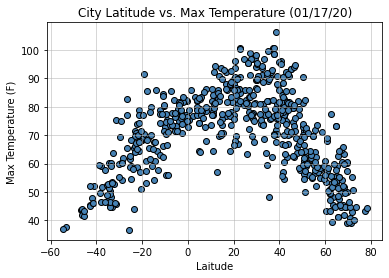

In [18]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig('lat vs temp')
plt.show()

## Latitude vs. Humidity Plot

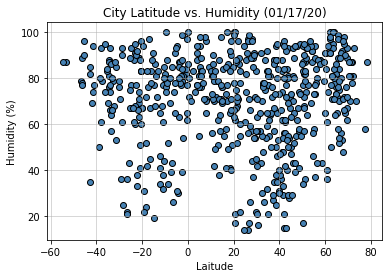

In [19]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(clean_df["Lat"], clean_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Humidity")


## Latitude vs. Cloudiness Plot

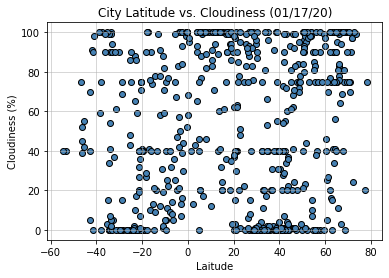

In [20]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(clean_df["Lat"], clean_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

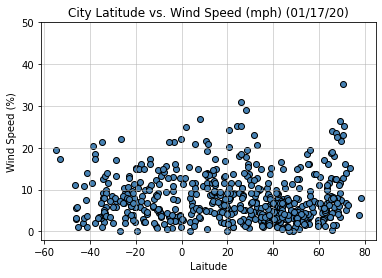

In [21]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(clean_df["Lat"], clean_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/17/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Latitude vs Wind Speed (mph)")

## Linear Regression

In [22]:
# Create Northern and Southern Hemisphere DataFrames
north = clean_df.loc[clean_df["Lat"] >= 0]
south= clean_df.loc[clean_df["Lat"] < 0]

In [40]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
      

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.66


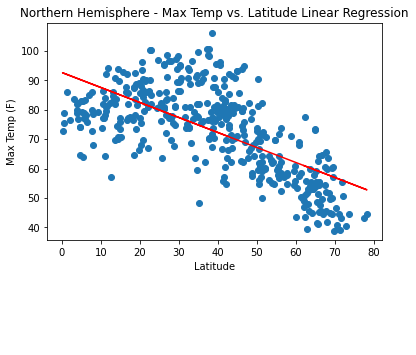

In [41]:
# Call an function #1
equation = linear_agression(north["Lat"], north["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.8


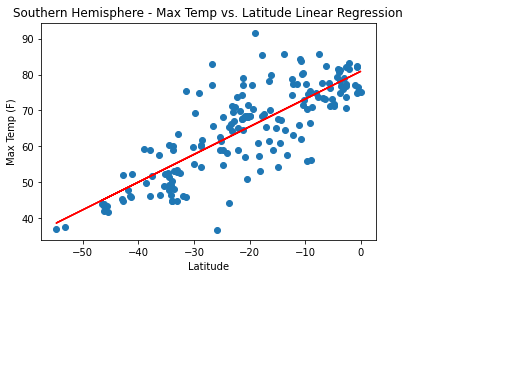

In [38]:
# Call an function #1
equation = linear_agression(south["Lat"], south["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
#plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.06


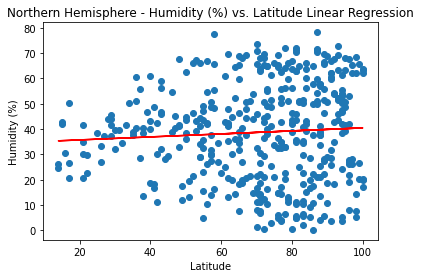

In [42]:
# Call an function #1
equation = linear_agression(north["Humidity"], north["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : -0.1


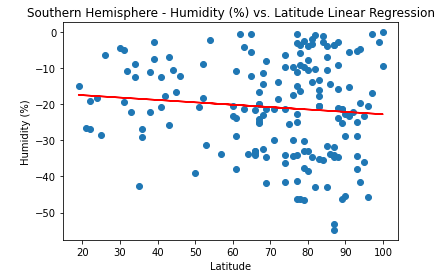

In [44]:
# Call an function #1
equation = linear_agression(south["Humidity"], south["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.01


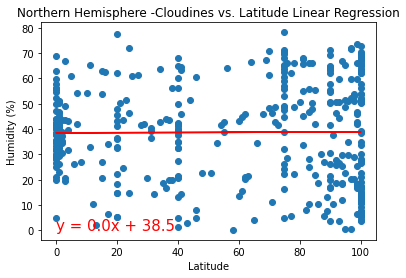

In [45]:
# Call an function #1
equation = linear_agression(north["Cloudiness"], north["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere -Cloudines vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.04


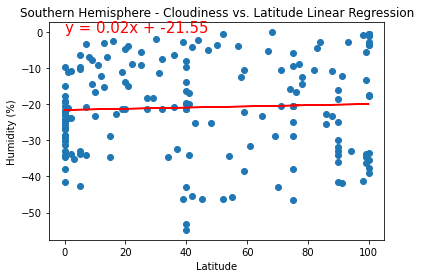

In [48]:
# Call an function #1
equation = linear_agression(south["Cloudiness"], south["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


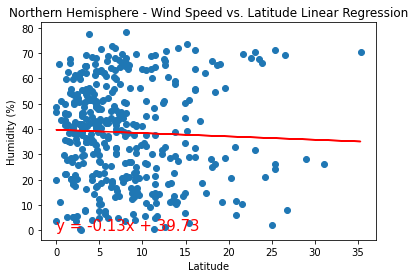

In [50]:
# Call an function #1
equation = linear_agression(north["Wind Speed"], north["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.04


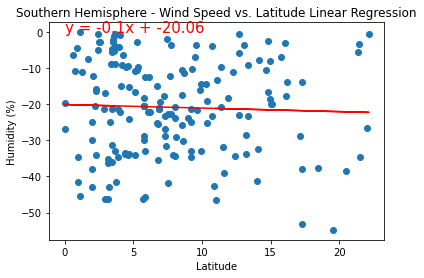

In [51]:
# Call an function #1
equation = linear_agression(south["Wind Speed"], south["Lat"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()